---
<a name='title'></a>
# **<font color="Navy"> Modelación Climática </font>**
## **<font color="RoyalBlue"> Tema 4: Modelos climáticos globales </font>**
### **<font color="DodgerBlue"> Notebook 4: Análisis avanzado y final </font>**
### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2024-II

---

### **<font color="ForestGreen"> Análisis de simulaciones con modelos globales </font>**

En el contexto de CMIP (Proyecto de Intercomparación de Modelos Acoplados, por sus siglas en inglés), es útil comparar entre diferentes simulaciones, modelos y observaciones por varias razones importantes:

1. Evaluación del rendimiento del modelo: Comparar las simulaciones de diferentes modelos con observaciones reales permite evaluar el rendimiento de los modelos en la representación de procesos climáticos clave. Esto es crucial para comprender la capacidad de los modelos para reproducir el clima pasado y presente, así como para proyectar el clima futuro.

2. Identificación de sesgos y deficiencias: La comparación entre diferentes simulaciones y observaciones puede ayudar a identificar sesgos y deficiencias en los modelos climáticos. Esto proporciona información sobre las áreas en las que los modelos pueden necesitar mejoras o ajustes para aumentar su precisión y utilidad en las proyecciones climáticas.

3. Validación cruzada: Comparar entre diferentes simulaciones y modelos también permite realizar validación cruzada, lo que significa verificar la consistencia y la robustez de los resultados a través de múltiples enfoques y fuentes de datos. Esto aumenta la confianza en las conclusiones derivadas de los modelos y los datos observacionales.

4. Análisis de incertidumbres: Las diferencias entre las simulaciones de diferentes modelos y entre los modelos y las observaciones proporcionan información sobre las incertidumbres asociadas con las proyecciones climáticas. Esto es esencial para comprender la variabilidad natural del clima y las incertidumbres en las predicciones futuras.

5. Detección de tendencias y cambios: Comparar entre diferentes simulaciones y observaciones también permite detectar tendencias y cambios en el clima a lo largo del tiempo. Esto es crucial para comprender cómo está evolucionando el clima y cómo podrían cambiar en el futuro bajo diferentes escenarios de emisiones y políticas de mitigación.

### **<font color="ForestGreen">  Comparando simulaciones de precipitación </font>**

**Datos de la simulación**

1. Actividad o Experimento: AMIP (Atmosphere Model Intercomparison Project). Utiliza temperaturas superficiales del mar prescritas como condición de frontera en lugar de un océano acoplado. 
2. Periodo: 1979-2014. Frecuentemente se analiza sólo 1979-2014 (que es el periodo que se puede comparar con observaciones). 
3. Forzamientos: Naturales y antropogénicos completos, utilizando la serie de tiempo observada de emisión de GEIs, aerosoles, forzamiento solar, etc. 
4. Variable: flujo de precipitación en superficie (precipitation_flux). 

In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=12.5)
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [6]:
# lectura de archivo
filename='pr_Amon_HadGEM3-GC31-LL_amip_r1i1p1f3_gn_197901-201412.nc'
ds=xr.open_dataset(filename)
prda=ds['pr']
prda

<xarray.DataArray 'pr' (time: 432, lat: 144, lon: 192)> Size: 48MB
[11943936 values with dtype=float32]
Coordinates:
  * time     (time) object 3kB 1979-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          kg m-2 s-1
    original_name:  mo: (stash: m01s05i216, lbproc: 128)
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-06-13T13:01:28Z altered by CMOR: replaced missing va...

#### **<font color="ForestGreen">  Las unidades de la precipitación </font>**

La unidad más utilizada para medir la precipitación son *mm*, los cuales indican cuánta altura en milímetros ocuparía un volumen de agua de lluvia sobre un recipiente cuya base tiene un área de 1 m$^{2}$.

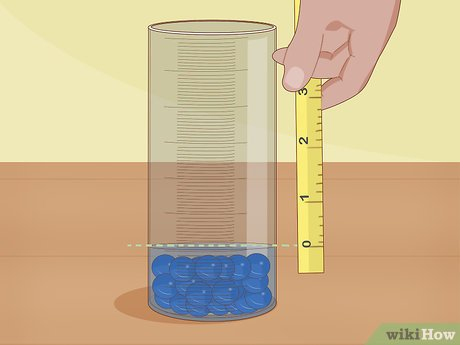

El flujo de precipitación también puede expresarse en unidades de masa por unidad de área y tiempo. En este caso, se utiliza la unidad de kilogramos por metro cuadrado por segundo (kg m$^{-2}$ s$^{-1}$), que representa la cantidad de masa de agua que cae sobre una superficie en un área específica durante un período de tiempo determinado. Esta unidad es comúnmente utilizada en el contexto de modelos climáticos y estudios hidrológicos para cuantificar el flujo de precipitación.

Para convertir de unidades de flujo a mm por día, necesitamos contar cuántos segundos hay en un día. Resulta que hay 86400 segundos en 1 día. 

In [7]:
prda.units

'kg m-2 s-1'

In [8]:
prda=prda*86400
prda['units']='mm day-1'

#### **<font color="ForestGreen"> Análisis climatológico </font>**

Así como en notebooks pasados, analizar la climatología, es decir el promedio temporal de nuestros 35 años, es un primer acercamiento a nuestros resultados de la simulación tipo AMIP. Lo que buscaremos hacer será:

1. Mapa de precipitación climatológica en AMIP. 

Para esto sabemos que tenemos que promediar el tiempo y luego graficar el objeto resultante con cartopy.

In [42]:
prm=prda.mean('time')
print(prm)

<xarray.DataArray 'pr' (lat: 144, lon: 192)> Size: 221kB
array([[0.16426525, 0.16388507, 0.16359451, ..., 0.16541307, 0.16503876,
        0.16477494],
       [0.17051125, 0.17014461, 0.16901647, ..., 0.17333152, 0.17217539,
        0.17114706],
       [0.15650748, 0.15498612, 0.15332054, ..., 0.16148649, 0.15974263,
        0.15723055],
       ...,
       [0.75059278, 0.75182666, 0.75183668, ..., 0.74139152, 0.7450705 ,
        0.74754344],
       [0.69689969, 0.6983132 , 0.70137991, ..., 0.69093042, 0.6929892 ,
        0.6950484 ],
       [0.63112014, 0.6315775 , 0.6316194 , ..., 0.63023684, 0.63037522,
        0.63079177]])
Coordinates:
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    units    <U8 32B 'mm day-1'


In [43]:
# guardamos las coordenadas en variables separadas para hacer los mapas fácilmente
lats=prm.lat
lons=prm.lon

Text(0.5, 0, 'pr  [mm day$^{-1}$]')

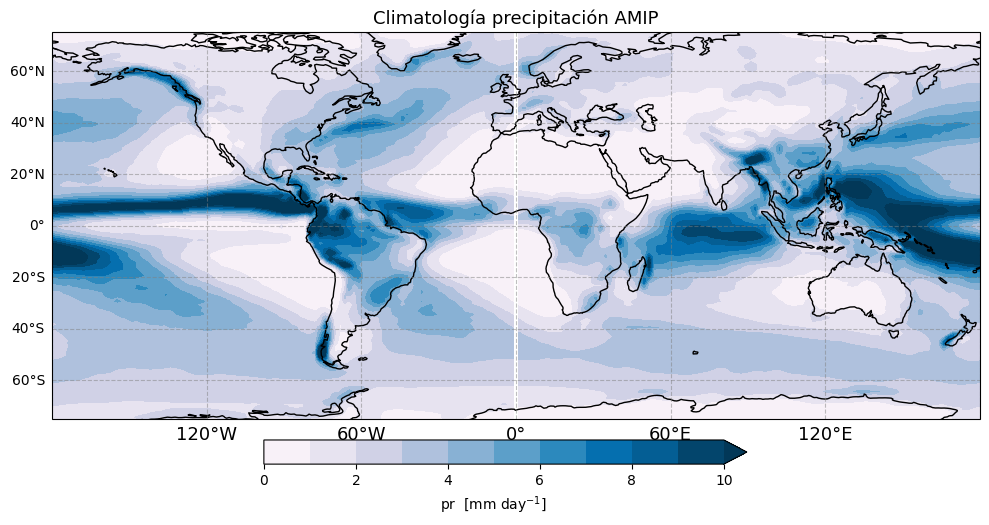

In [44]:
fig = plt.figure(figsize=(10, 6))
# hacemos objeto de mapa
ax = plt.axes(projection=ccrs.PlateCarree())
# agregamos lineas costeras
ax.coastlines()
# plot de contorno, extend con max y no both
cs=ax.contourf(lons,lats,prm,levels=np.arange(0,11),cmap='PuBu',extend='max',transform=ccrs.PlateCarree()) #extend='max' o extend='neither' cambia la barra
# definimos la extension del mapa
ax.set_extent([0,359.1, -75, 75], crs=ccrs.PlateCarree())
# Agregamos lineas de paralelo y meridiano
gl=ax.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
# quitamos las etiquetas de arriba
gl.top_labels = gl.right_labels = False
# hacemos mas grande las etiquetas de los ejes
gl.xlabel_style = {'size': 13}
gl.xlabel_style = {'size': 13}
# agregamos titulo
plt.title('Climatología precipitación AMIP',fontsize=13)
# ajustar plot a todo el espacio
plt.tight_layout()
# 
plt.subplots_adjust(bottom=0.1)
# agregar colorbar
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.046, pad=0.04)
cbar.ax.set_xlabel('pr  [mm day$^{-1}$]')

#### **<font color="ForestGreen"> La molesta línea blanca </font>**

Resulta que nuestros datos no son 100% globales en el sentido de que tenemos en la longitud una coordenada que empieza en 0 y termina en 359. A pesar de la gran capacidad de cartopy y matplotlib, no son capaces de rellenar los datos que sabemos debieran ser necesarios, por lo menos no sin ayuda. Para ayudarles, cartopy tiene una función que permite terminar de rellenar los datos y generar un ciclo completo de 360 grados de longitud. Esta función se llama `add_cyclic_point()`

In [45]:
print(lons.shape)
print(prm.shape)

(192,)
(144, 192)


In [46]:
from cartopy.util import add_cyclic_point #agregamos el cero 
data, lon = add_cyclic_point(prm, coord=lons)

In [47]:
print(data.shape)
print(lon.shape)

(144, 193)
(193,)


Text(0.5, 0, 'pr  [mm day$^{-1}$]')

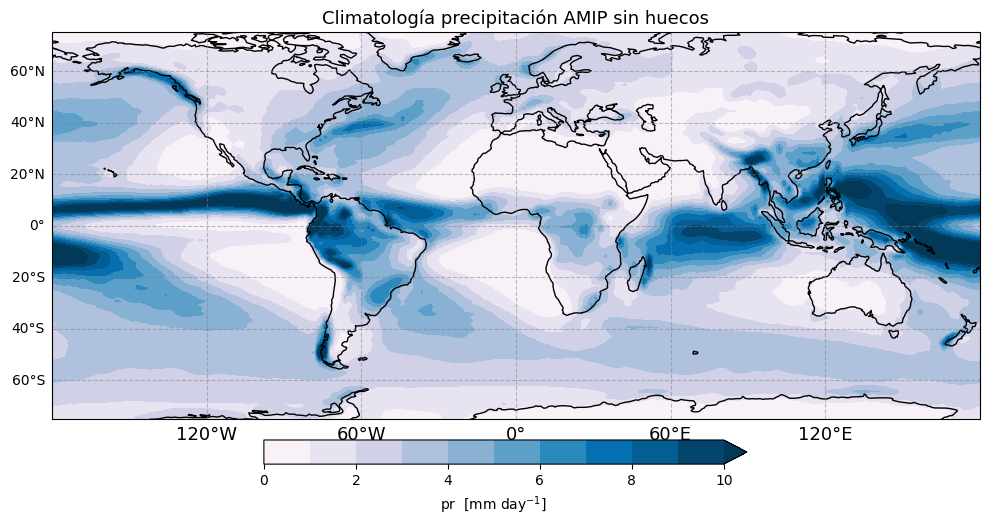

In [48]:
fig = plt.figure(figsize=(10, 6))
# hacemos objeto de mapa
ax = plt.axes(projection=ccrs.PlateCarree())
# agregamos lineas costeras
ax.coastlines()
# plot de contorno, extend con max y no both
cs=ax.contourf(lon,lats,data,levels=np.arange(0,11),cmap='PuBu',extend='max',transform=ccrs.PlateCarree())
# definimos la extension del mapa
ax.set_extent([0,359.1, -75, 75], crs=ccrs.PlateCarree())
# Agregamos lineas de paralelo y meridiano
gl=ax.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
# quitamos las etiquetas de arriba
gl.top_labels = gl.right_labels = False
# hacemos mas grande las etiquetas de los ejes
gl.xlabel_style = {'size': 13}
gl.xlabel_style = {'size': 13}
# agregamos titulo
plt.title('Climatología precipitación AMIP sin huecos',fontsize=13)
# ajustar plot a todo el espacio
plt.tight_layout()
# 
plt.subplots_adjust(bottom=0.1)
# agregar colorbar
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.046, pad=0.04)
cbar.ax.set_xlabel('pr  [mm day$^{-1}$]')

Una vez que tenemos todo para un mapa bonito, podría sernos útil para el proyecto, la práctica y la vida, tener una función que haga mapas completos y bonitos. Esta función se llamará `mapa_MC` y se describe en la siguiente celda. 

In [49]:
def mapa_MC(data,levels,ccmap,titulo,extend='both',cbarlabel='pr  [mm day$^{-1}$]',limite_NS=75):
    """
        **  Funcion para mapa global  **

    *Parameters*

    data: `xr.DataArray`
        Arreglo de xarray de los datos a graficar. Se asume que ya es un arreglo 2D (ya no existe la dimensión del tiempo)
    levels: `np.array`
        Arreglo de valores para los colores
    ccmap: `str`
        String para especificar el colormap a utilizar en el mapa
    titulo: `str`
        String para especificar el título del gráfico
        
    .. nota::

        Esta función esta hecha para graficar un solo mapa y necesita bastante modificación si se busca hacer un gráfico multi-panel.
        Asume que las coordenadas se llaman: lat y lon.

    *Returns*
        cs: `figure` Figura dibujada u objeto de figura

    """
    lons,lats=data.lon,data.lat
    # quitar linea blanca del medio para hacer mapa mas bonito
    data, lon = add_cyclic_point(data, coord=lons)
    fig = plt.figure(figsize=(10, 6))
    # hacemos objeto de mapa
    ax = plt.axes(projection=ccrs.PlateCarree())
    # agregamos lineas costeras
    ax.coastlines()
    # plot de contorno, extend con max y no both
    cs=ax.contourf(lon,lats,data,levels=levels,cmap=ccmap,extend=extend,transform=ccrs.PlateCarree())
    # definimos la extension del mapa
    ax.set_extent([0,359.1, -limite_NS, limite_NS], crs=ccrs.PlateCarree())
    # Agregamos lineas de paralelo y meridiano
    gl=ax.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
    # quitamos las etiquetas de arriba
    gl.top_labels = gl.right_labels = False
    # hacemos mas grande las etiquetas de los ejes
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    # agregamos titulo
    plt.title(titulo,fontsize=13)
    # ajustar plot a todo el espacio
    plt.tight_layout()
    # ajustar el botom del plot
    plt.subplots_adjust(bottom=0.1)
    # agregar colorbar
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.046, pad=0.05)
    cbar.ax.set_xlabel(cbarlabel)

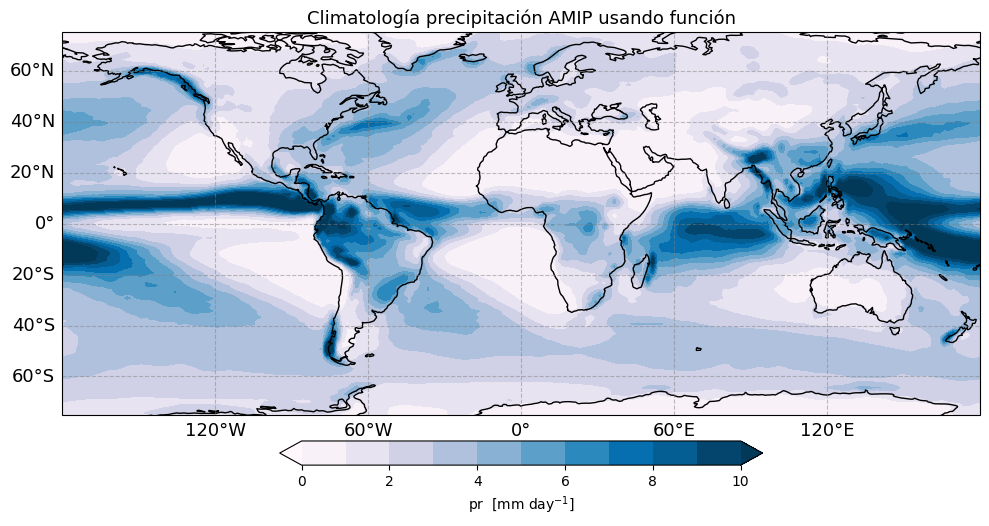

In [50]:
mapa_MC(prm,np.arange(0,11),'PuBu','Climatología precipitación AMIP usando función') #extend='max'

#### **<font color="ForestGreen"> Ahora la simulación histórica </font>**

In [51]:
# lectura de archivo
filename='pr_Amon_HadGEM3-GC31-LL_historical_r2i1p1f3_gn_195001-201412.nc'
histds=xr.open_dataset(filename)
histprda=histds['pr']

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 7 - Mapa de precipitación para Historical </font>**

<font color="DarkBlue"> 1. Repita el mapa anterior para la simulación histórica. Considere solamente los mismos años que se encuentren en la simulación AMIP.
       
    
---

In [19]:
histprda=histprda*86400
histprda['units']='mm day-1'

In [20]:
histprda1=histprda[(histprda.time.dt.year>=1979)&(histprda.time.dt.year<=2014)]
histprda1

<xarray.DataArray 'pr' (time: 432, lat: 144, lon: 192)> Size: 96MB
array([[[0.05449395, 0.05067926, 0.04932933, ..., 0.05882685,
         0.05599859, 0.05571439],
        [0.06494372, 0.0695735 , 0.08303649, ..., 0.06102234,
         0.06846756, 0.07555531],
        [0.09002527, 0.1015248 , 0.10819114, ..., 0.08868182,
         0.08148213, 0.08598835],
        ...,
        [0.44675537, 0.42924814, 0.41171671, ..., 0.50111046,
         0.48313713, 0.46588788],
        [0.18550037, 0.18061853, 0.17586705, ..., 0.2009615 ,
         0.19564955, 0.19041345],
        [0.13921928, 0.13989079, 0.1403367 , ..., 0.13662878,
         0.13762497, 0.13847359]],

       [[0.32762093, 0.32837517, 0.32872363, ..., 0.32718707,
         0.32717275, 0.32723259],
        [0.28051939, 0.28210657, 0.28341046, ..., 0.27681432,
         0.27812885, 0.27922299],
        [0.21764755, 0.21920656, 0.2203623 , ..., 0.21553788,
         0.21489162, 0.21561855],
...
        [0.27227324, 0.27369879, 0.27363553, ..., 0.26928941,
         0.26854455, 0.270242  ],
        [0.20052081, 0.20332284, 0.20639976, ..., 0.19423271,
         0.19538311, 0.19762296],
        [0.1854943 , 0.1860169 , 0.18615669, ..., 0.18376866,
         0.18424479, 0.18496932]],

       [[0.34599282, 0.3661552 , 0.33397553, ..., 0.38515396,
         0.36886123, 0.35007743],
        [0.19312213, 0.17083924, 0.16139965, ..., 0.23850821,
         0.21814644, 0.1849829 ],
        [0.11824577, 0.16894935, 0.10600038, ..., 0.15477867,
         0.134335  , 0.11437894],
        ...,
        [0.44115275, 0.42732403, 0.41262129, ..., 0.46016935,
         0.45783512, 0.45206375],
        [0.3824741 , 0.38437971, 0.38579282, ..., 0.37967373,
         0.38054373, 0.38152921],
        [0.27731736, 0.27690357, 0.27680696, ..., 0.27888258,
         0.27838691, 0.27787879]]])
Coordinates:
  * time     (time) object 3kB 1979-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    units    <U8 32B 'mm day-1'

In [21]:
histprda2=histprda1.mean('time')
print(histprda2)

<xarray.DataArray 'pr' (lat: 144, lon: 192)> Size: 221kB
array([[0.16088228, 0.16093805, 0.16094495, ..., 0.16109032, 0.16091043,
        0.16092028],
       [0.16374469, 0.16227335, 0.16201485, ..., 0.16609772, 0.16529083,
        0.16477781],
       [0.15148511, 0.15034525, 0.14870669, ..., 0.15535782, 0.15380796,
        0.15238433],
       ...,
       [0.62883861, 0.63213096, 0.63475065, ..., 0.62359607, 0.62493648,
        0.62623512],
       [0.61127366, 0.61191885, 0.61254409, ..., 0.60719036, 0.60823756,
        0.61002916],
       [0.57576055, 0.57631637, 0.57643236, ..., 0.57694657, 0.5762873 ,
        0.5761191 ]])
Coordinates:
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    units    <U8 32B 'mm day-1'


In [22]:
lats1=histprda2.lat
lons1=histprda2.lon

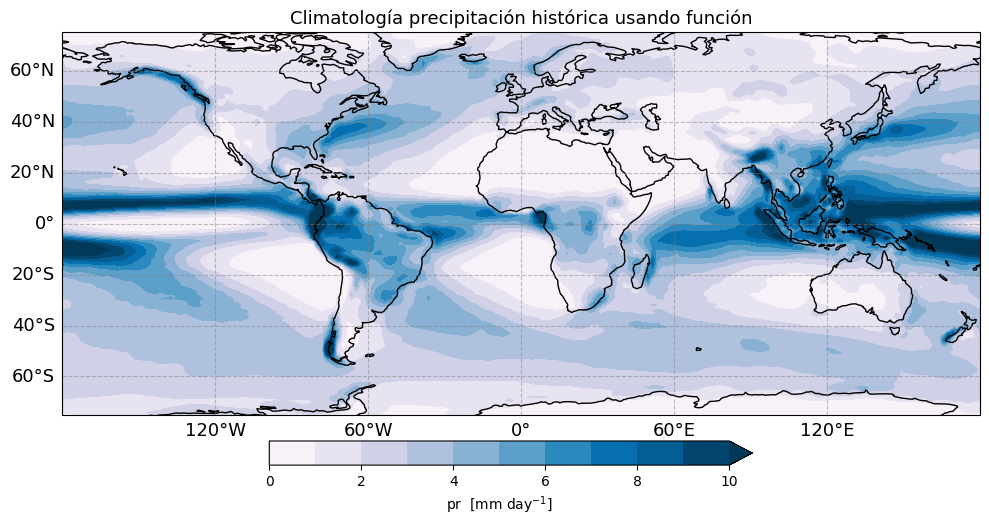

In [23]:
mapa_MC(histprda2,np.arange(0,11),'PuBu','Climatología precipitación histórica usando función', extend='max') #extend='max'

En el experimento "historical", los modelos climáticos se ejecutan para simular el clima pasado desde el siglo XIX hasta el presente utilizando datos de forzamiento observados, como emisiones de gases de efecto invernadero, aerosoles, cambios en el uso del suelo, entre otros. Estos experimentos tienen **océano acoplado**, lo cual quiere decir que simulan la dinámica del océano y tienen todas las retroalimentaciones océano-atmósfera. Estas simulaciones se inicializan en 1850 y se deja correr al modelo libremente, sujeto a los forzamiento claro está hasta 2014. Sus resultados están sujetos a las implicaciones de Lorenz, ya que cada realización con ligeramente diferentes condiciones iniciales resultan en valores puntuales muy diferentes a lo largo de la simulación. Por ejemplo, dos simulaciones históricas pueden estar en fases completamente diferentes de una oscilación climática, como lo es la de El Niño Oscilación del Sur. 

En cambio un experimento AMIP, las temperaturas superficiales (SST) se imponen utilizando datos observacionales de SST. Esto quiere decir que el océano ya no está acoplado y es una condición de frontera. Ahora la variabilidad de la SST es la observada, esto quiere decir que todas estas simulaciones tiene los mismos años de El Niño que las observaciones. A pesar de esta diferencia notable, el resto de la simulación es muy parecida, ya que los forzamientos son los mismos y en nuestro caso, estamos usando el mismo modelo.

Veamos las diferencias entre la simulación AMIP

In [52]:
histprm=histprda.mean('time')*86400

In [25]:
histprm=histprda.mean('time')*86400
diferencia=histprda2-prm
#tiene muchos sesgos el histórico
diferencia

<xarray.DataArray 'pr' (lat: 144, lon: 192)> Size: 221kB
array([[-0.00338297, -0.00294702, -0.00264956, ..., -0.00432274,
        -0.00412833, -0.00385466],
       [-0.00676656, -0.00787127, -0.00700162, ..., -0.0072338 ,
        -0.00688456, -0.00636924],
       [-0.00502237, -0.00464087, -0.00461385, ..., -0.00612867,
        -0.00593467, -0.00484622],
       ...,
       [-0.12175417, -0.1196957 , -0.11708603, ..., -0.11779545,
        -0.12013402, -0.12130832],
       [-0.08562603, -0.08639435, -0.08883582, ..., -0.08374006,
        -0.08475164, -0.08501924],
       [-0.0553596 , -0.05526113, -0.05518704, ..., -0.05329027,
        -0.05408792, -0.05467267]])
Coordinates:
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    units    <U8 32B 'mm day-1'

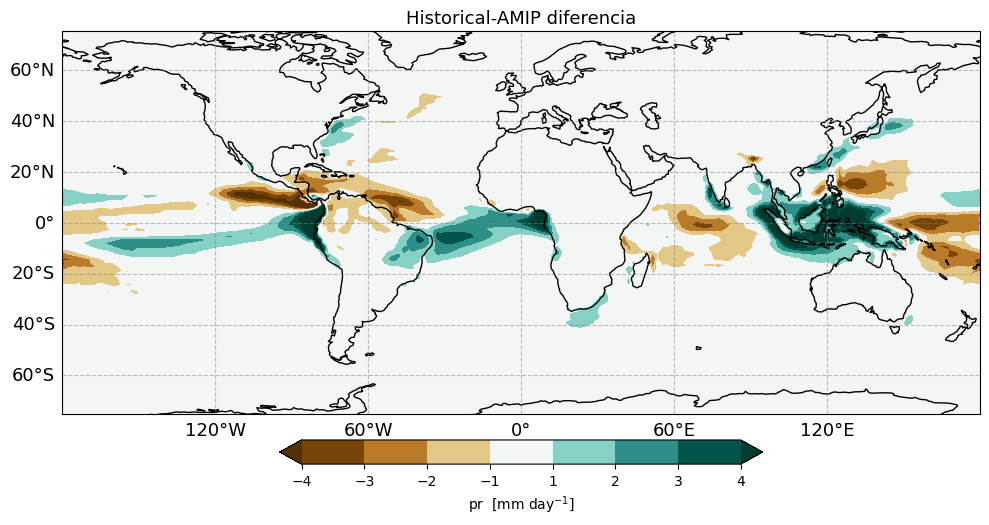

In [26]:
mapa_MC(diferencia,[-4,-3,-2,-1,1,2,3,4],'BrBG','Historical-AMIP diferencia')

A través de la comparación entre experimentos notamos que hay bastantes diferencias espaciales entre estas dos simulaciones. No es evidente que una simulación sea más lluviosa que la otra sino que hay diferencias regionales. En el mar Caribe, por ejemplo, hay más precipitación en AMIP que en historical y en la zona del Este del Brasil ocurre lo opuesto. En la zona del océano Índico y Pacífico vemos una estructura zonal caracterizada por zonas alternadas de diferencias positivas con negativas indicando una diferencia en la circulación zonal, la circulación de Walker.

<div class="alert alert-block alert-info">
<b>Nota:</b> Estas dos simulaciones provienen del mismo modelo atmosférico, con los mismos forzamientos y parametrizaciones. Las diferencias se deben principalmente al tratamiento del océano y su acoplamiento con la atmósfera.
</div>

#### **<font color="ForestGreen"> Diferencias temporales </font>**

Una vez que hemos dado un vistazo a diferencias espaciales entre las simulaciones, podemos analizar diferencias temporales como lo pueden ser diferencias en un ciclo anual. 

In [53]:
# seleccion para amip y luego historica
# la historica se convierte a unidaes, la amip no porque ya lo habiamos hecho
prsel_amip=prda.sel(lat=16,lon=265,method='nearest')
prsel_hist=histprda.sel(lat=16,lon=265,method='nearest')*86400

In [54]:
print(prsel_amip)

<xarray.DataArray 'pr' (time: 432)> Size: 3kB
array([1.65185733e-03, 3.32585798e-02, 9.57268001e-03, 7.16267137e-02,
       1.48042567e+00, 8.33592026e+00, 1.03407600e+01, 5.41197087e+00,
       8.94495563e+00, 2.04137223e+00, 2.61749509e-01, 5.15416384e-03,
       2.95958954e-03, 1.90090437e-03, 5.41091099e-03, 2.47107379e-01,
       1.55582508e+00, 7.49220878e+00, 3.60923567e+00, 1.31191673e+00,
       1.04867579e+01, 1.95947769e+00, 3.29139547e+00, 9.84599606e-02,
       8.50839399e-03, 4.20774251e-03, 2.50203370e-03, 9.81836145e-03,
       7.09957234e-02, 1.20180603e+00, 8.00670587e-01, 1.56548324e+00,
       6.64173500e+00, 3.48772688e+00, 8.73535796e-03, 2.71923315e-03,
       2.37888014e-02, 3.32829403e-03, 1.38399431e-02, 6.74812864e-02,
       1.82563666e+00, 2.35763501e-01, 2.98611367e+00, 2.16177130e+00,
       4.76349194e+00, 4.39330341e+00, 7.68421107e-02, 1.31635452e-01,
       4.32912464e-01, 1.24886787e+00, 4.95471972e+00, 1.63646895e+00,
       7.18755060e-01, 2.142187

In [55]:
mensual_amip=prsel_amip.groupby(prsel_amip.time.dt.month).mean()
mensual_hist=prsel_hist.groupby(prsel_hist.time.dt.month).mean()

In [56]:
meses=['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']

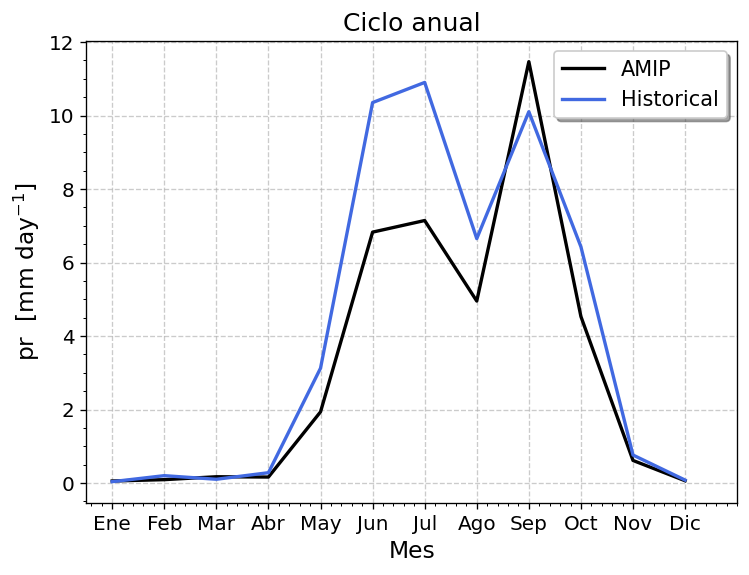

In [57]:
plt.figure(figsize=(7,5),dpi=120)
plt.plot(meses,mensual_amip,linewidth=2,c='k',label='AMIP')
plt.plot(meses,mensual_hist,linewidth=2,c='royalblue',label='Historical')
lineplot_setup(-0.5,12,'Mes','pr  [mm day$^{-1}$]',title='Ciclo anual',legend=True)

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 8 - Ciclo anual </font>**

<font color="DarkBlue"> 1. Repita el análisis de ciclo anual para un área grande en el Amazonas. 
<font color="DarkBlue"> 2. Compare simulación histórica versus AMIP y asegúrese de ponderar sus promedios de área si es que considera que vale la pena hacerlo.    
       
    
---

In [31]:
prsel_amip=prda.sel(lat=slice(-15, 5),lon=slice(280, 310))#method='nearest')
prsel_hist=histprda.sel(lat=slice(-15, 5),lon=slice(280, 310))*86400 #method='nearest')*86400
prsel_hist

<xarray.DataArray 'pr' (time: 780, lat: 16, lon: 16)> Size: 2MB
array([[[   9907.14045824,   18869.08745393,  250071.00328803, ...,
          953792.12290049, 1446603.70454192, 1569857.08549619],
        [   4740.90046948,   73802.99437791,  769056.52865767, ...,
          946148.7364769 , 1182554.69620228, 1449467.39450097],
        [   5592.30427025,  468845.91199458,  962011.35411859, ...,
          737261.44462824,  782946.81541622, 1227580.08867502],
        ...,
        [1047571.50560617,  400029.36311066,  383628.83951515, ...,
          255907.55581856,  290620.3186512 ,  381340.55983275],
        [1218140.51404595,  705339.31843936,  471001.66372955, ...,
          380596.88251466,  317532.58969635,  447032.27352351],
        [ 138199.66832176,  406262.63044775,  382585.8065486 , ...,
          336239.99577016,  326041.67148471,  303344.57673132]],

       [[  17615.15886756,   18871.891452  ,  154375.17955899, ...,
          978574.41455126, 1672165.94517231, 1562691.01694226],
        [  10133.22044048,   54707.98479393,  427572.4183023 , ...,
         1409699.45088029, 1386921.37286067, 1258262.91561127],
        [   7187.15709751,  266924.0500778 , 1079734.40900445, ...,
         1192662.4506712 , 1010775.22963285, 1492956.11456037],
...
        [1326817.12433696,  616635.70180535,  884551.91910267, ...,
          369003.07696313,  174467.86930785,  227643.44539493],
        [1828186.53523922, 1348446.66302204,  777304.11216617, ...,
          411871.93013728,  246620.06244063,  337789.67656195],
        [2263845.43955326, 1519791.93761945,  755798.35675657, ...,
          344401.00159496,  414722.66603261,  543599.27840531]],

       [[   8326.08017838,   19817.76215136,  128782.74293616, ...,
          817106.38269782,  968922.25205898, 1185519.52019334],
        [   9587.57039392,   62958.88829045,  488876.04475021, ...,
          960190.83291292, 1246283.36682916,  834031.77671134],
        [   8905.39687243,  158811.44396961,  897072.33399153, ...,
         1252551.83011293,  980271.96720243,  908233.08818042],
        ...,
        [1000085.11260152,  505265.35235345,  891782.5678736 , ...,
          325613.53560537,  401494.66596544,  609428.62562835],
        [1291930.44573069,  856621.59986794,  905530.71297705, ...,
          325149.82357621,  405482.9153046 ,  728083.23249221],
        [1357175.36643147, 1021765.38124681,  873470.79031169, ...,
          243782.14482218,  333659.63861346,  385881.13568723]]])
Coordinates:
  * time     (time) object 6kB 1950-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lat      (lat) float64 128B -14.38 -13.12 -11.88 ... 1.875 3.125 4.375
  * lon      (lon) float64 128B 280.3 282.2 284.1 285.9 ... 304.7 306.6 308.4
    units    <U8 32B 'mm day-1'

In [32]:
area_amip=prsel_amip.mean('lat')
area_hist=prsel_hist.mean('lat')
area_amip1=area_amip.mean('lon')
area_hist1=area_hist.mean('lon')
print(area_amip1, area_hist1)

<xarray.DataArray 'pr' (time: 432)> Size: 3kB
array([ 6.40901619,  7.80616724,  8.90662474,  8.27146174,  8.39808528,
        4.78253524,  4.0217627 ,  3.42494499,  5.18073082,  8.05540332,
        6.28558792,  9.01367854,  8.0603209 ,  8.53073134,  9.39587274,
        9.67748908,  6.3711771 ,  5.17518248,  4.69377208,  4.10563721,
        3.80448534,  6.10696267,  8.75257961,  7.88029127,  8.25864689,
        9.35499546,  9.40686255,  8.2702013 ,  6.67972487,  4.68162298,
        4.32153888,  3.9289113 ,  4.76923242,  8.11615   ,  6.83539597,
        6.98968046,  8.27746675,  8.12656294,  8.96381677,  8.53390561,
        6.35173022,  4.72815483,  4.01027791,  4.12215499,  6.20662439,
        5.10123173,  5.47457561,  4.9969949 ,  4.98064585,  7.13892175,
        9.84748922,  7.53411844,  6.48587582,  3.99546523,  2.97491638,
        3.93892876,  4.13570752,  5.6321979 ,  6.74364221,  7.05520574,
        7.76001289,  8.56673703,  7.64921976,  7.78735484,  8.30639144,
        6.42179278

In [33]:
mensual_amip=area_amip1.groupby(area_amip1.time.dt.month).mean()
mensual_hist=area_hist1.groupby(area_hist1.time.dt.month).mean()
print(mensual_amip, mensual_hist)

<xarray.DataArray 'pr' (month: 12)> Size: 96B
array([7.84491188, 8.57350454, 8.73488566, 8.62298323, 7.3912768 ,
       5.55687743, 4.33916878, 4.01754771, 4.93288295, 6.19833377,
       6.96439973, 7.55467717])
Coordinates:
    units    <U8 32B 'mm day-1'
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12 <xarray.DataArray 'pr' (month: 12)> Size: 96B
array([622048.53960933, 613490.69990425, 642232.00166099, 630654.83000107,
       599463.3177173 , 542428.41133691, 440047.26550933, 380998.23600708,
       441827.07296329, 551255.97464135, 670291.71912373, 673096.15544586])
Coordinates:
    units    <U8 32B 'mm day-1'
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


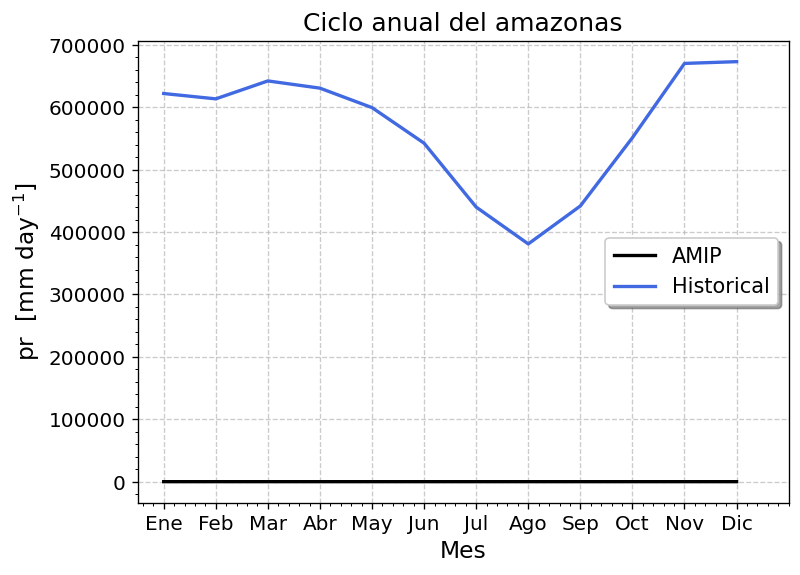

In [34]:
plt.figure(figsize=(7,5),dpi=120)
plt.plot(meses,mensual_amip,linewidth=2,c='k',label='AMIP')
plt.plot(meses,mensual_hist,linewidth=2,c='royalblue',label='Historical')
lineplot_setup(-0.5,12,'Mes','pr  [mm day$^{-1}$]',title='Ciclo anual del amazonas',legend=True)

### **<font color="ForestGreen"> Comparación con más variables: la OLR </font>**

Muchas veces analizar una sola variable no es suficiente, es útil, sí pero siempre es mejor analizar dos o más variables. Por ejemplo, si quisiéramos analizar las diferencias asociadas a la convección y la precipitación entre estas dos simulaciones, podría ser interesante analizar otra variable relacionada con la convección. 

OLR son las siglas en inglés de "Outgoing Longwave Radiation", que se traduce al español como "Radiación de Onda Larga Saliente". Se refiere a la energía radiante emitida por la superficie de la Tierra y la atmósfera hacia el espacio en forma de radiación infrarroja de longitud de onda larga. La OLR es una medida importante en el estudio del clima y la meteorología porque refleja la cantidad de energía térmica que la Tierra y su atmósfera están emitiendo hacia el espacio.

La relación entre OLR y precipitación se basa en el hecho de que la formación de nubes, la absorción de energía térmica por parte de las gotitas de agua, además de la liberación de calor latente asociada con la condensación de vapor de agua en la atmósfera, afectan la cantidad de OLR que finalmente se emite desde la Tierra hacia el espacio. Debido a que la emisión térmica de las nubes depende fuertemente del nivel de emisión, o sea de la **altura de la nube**, la OLR es un proxy para la altura de la convección.

En general, en áreas donde la precipitación es alta, como en regiones de intensa convección atmosférica profunda, como las zonas tropicales donde se forman tormentas y sistemas meteorológicos, la OLR tiende a ser baja. Esto se debe a que la formación de nubes y la liberación de calor latente durante la condensación del vapor de agua actúan para atrapar parte de la energía térmica, lo que resulta en una menor emisión de energía de onda larga hacia el espacio. Por lo tanto, en estas áreas, la OLR puede utilizarse como un indicador indirecto de la actividad de lluvia y tormentas, y a menudo se utiliza en modelos climáticos y estudios para monitorear la evolución de los sistemas meteorológicos y su relación con la precipitación.



In [58]:
amipf='rlut_Amon_HadGEM3-GC31-LL_amip_r1i1p1f3_gn_197901-201412.nc'
histf='rlut_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_195001-201412.nc'

In [59]:
amipds=xr.open_dataset(amipf)
histds=xr.open_dataset(histf)

In [60]:
amipds

<xarray.Dataset> Size: 48MB
Dimensions:    (time: 432, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) object 3kB 1979-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lat        (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 7kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    rlut       (time, lat, lon) float32 48MB ...
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          no parent
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-06-13T13:01:38Z
    ...                     ...
    title:                  HadGEM3-GC31-LL output prepared for CMIP6
    tracking_id:            hdl:21.14100/dec11464-067c-4fc5-9ecd-3db4b29c97e0
    variable_id:            rlut
    variant_label:          r1i1p1f3
    license:                CMIP6 model data produced by the Met Office Hadle...
    cmor_version:           3.4.0

El término "RLUT" es una abreviatura utilizada en el contexto del modelo de datos CMIP (Coupled Model Intercomparison Project) y se refiere a "Realized Longwave Upward Flux at Top of Model". Esta es una forma técnica de referirse a la radiación de onda larga que sale de la parte superior de la atmósfera del modelo climático.

In [61]:
amipda=amipds['rlut']
histda=histds['rlut']

In [62]:
histda.units

'W m-2'

In [63]:
olramip=amipda.mean('time')
olrhist=histda.mean('time')

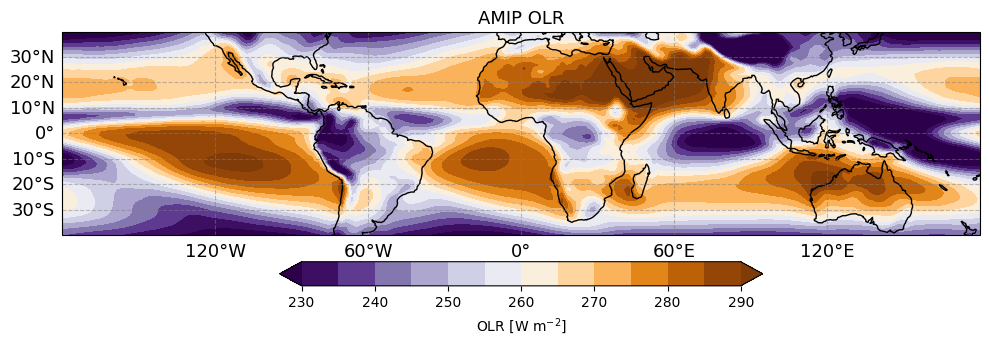

In [64]:
mapa_MC(olramip,np.arange(230,291,5),'PuOr_r','AMIP OLR',extend='both',cbarlabel='OLR [W m$^{-2}$]',limite_NS=40)

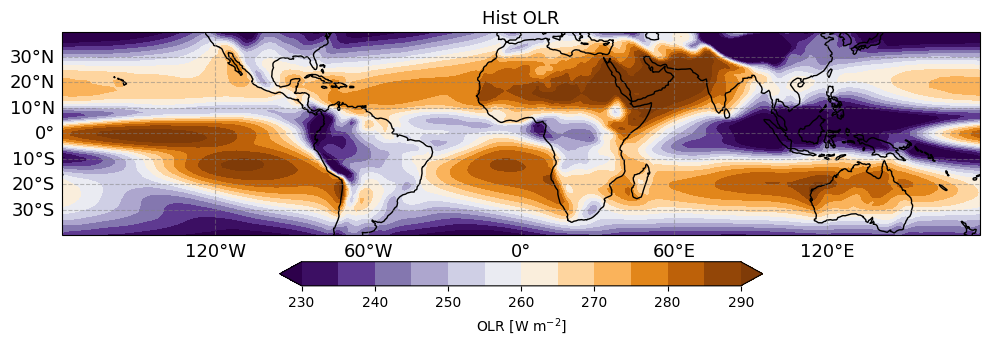

In [65]:
mapa_MC(olrhist,np.arange(230,291,5),'PuOr_r','Hist OLR',extend='both',cbarlabel='OLR [W m$^{-2}$]',limite_NS=40)

### **<font color="ForestGreen"> Contourf versus contour </font>**

En Matplotlib, `contourf` y `contour` son funciones utilizadas para trazar gráficos de contorno (mapas de contorno) en 2D. La principal diferencia entre ambas radica en cómo se representan los datos en el gráfico.

- `contourf`: Esta función se utiliza para crear gráficos de contorno rellenos. Es decir, los contornos se dibujan y luego se colorean las áreas entre los contornos con colores sólidos.

- `contour`: En cambio, esta función se utiliza para trazar únicamente las líneas de contorno sin rellenar las áreas entre los contornos. Es útil cuando se desea un gráfico más simple que muestre solo las líneas de contorno.

Usar contourf y contour al mismo tiempo puede ser útil cuando deseas combinar la representación de contornos rellenos con líneas de contorno no rellenas sobre el mismo gráfico. Esto puede proporcionar una visualización más detallada de los datos y resaltar áreas de interés. 

In [66]:
levels=np.arange(0,11) #si
ccmap='PuBu' #si
extend='max' #si
limite_NS=42 #si
clevels=np.arange(230,300,15) #falta 
titulo='OLR y pr' #si
cbarlabel='pr  [mm day$^{-1}$]' #si

Text(0.5, 0, 'pr  [mm day$^{-1}$]')

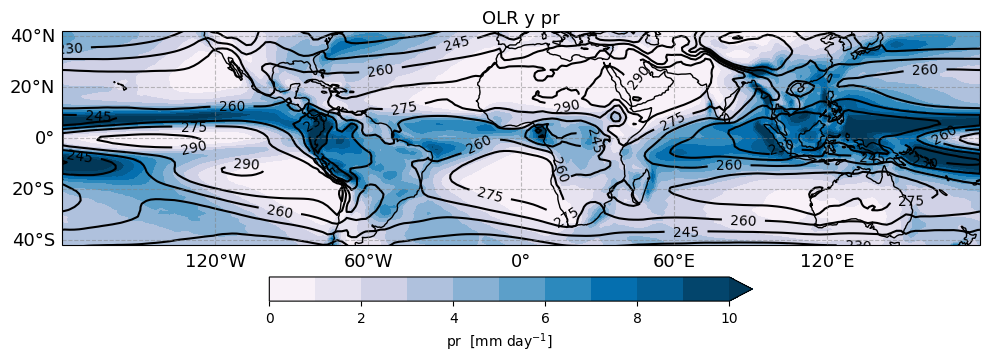

In [67]:
data=histprm
contourdata=olrhist

lons,lats=data.lon,data.lat
# quitar linea blanca del medio para hacer mapa mas bonito
data, lon = add_cyclic_point(data, coord=lons)
contourdata, lon = add_cyclic_point(contourdata, coord=lons)
fig = plt.figure(figsize=(10, 6))
# hacemos objeto de mapa
ax = plt.axes(projection=ccrs.PlateCarree())
# agregamos lineas costeras
ax.coastlines()
# plot de contorno, extend con max y no both
cs=ax.contourf(lon,lats,data,levels=levels,cmap=ccmap,extend=extend,transform=ccrs.PlateCarree())
###### Agregamos contour
cc=ax.contour(lon,lats,contourdata,levels=clevels,colors='k',transform=ccrs.PlateCarree())

#agrega las etiqueta a los niveles del grafico de contorno de lineas
ax.clabel(cc, cc.levels, inline=True, fontsize=10)

# definimos la extension del mapa
ax.set_extent([0,359.1, -limite_NS, limite_NS], crs=ccrs.PlateCarree())
# Agregamos lineas de paralelo y meridiano
gl=ax.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
# quitamos las etiquetas de arriba
gl.top_labels = gl.right_labels = False
# hacemos mas grande las etiquetas de los ejes
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
# agregamos titulo
plt.title(titulo,fontsize=13)
# ajustar plot a todo el espacio
plt.tight_layout()
# ajustar el botom del plot
plt.subplots_adjust(bottom=0.1)
# agregar colorbar
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.046, pad=0.06)
cbar.ax.set_xlabel(cbarlabel)

En este ejemplo, contourf se utiliza para trazar el gráfico de contorno relleno, para la variable precipitación y contour se utiliza para trazar líneas de contorno no rellenas sobre el mismo gráfico utilizando la variable OLR.

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 9 - Contour </font>**

<font color="DarkBlue"> 1. Escriba una función para hacer mapas con contourf y contour al mismo tiempo cuyos parámetros de entradas sean muy parecidos a la función mapa_MC pero además permita graficar con contour. 
    
<font color="DarkBlue"> 2. Utilice esta función para graficar los datos de precipitación y OLR de AMIP en un mismo mapa.   
       
    
---

In [68]:
def new_map(data,levels, contourdata, ccmap,titulo,extend='both',cbarlabel='pr  [mm day$^{-1}$]',limite_NS=75, clevels=np.arange(230,300,15)):
    
    lons,lats=data.lon,data.lat
    # quitar linea blanca del medio para hacer mapa mas bonito
    data, lon = add_cyclic_point(data, coord=lons)
    contourdata, lon = add_cyclic_point(contourdata, coord=lons)
    
    fig = plt.figure(figsize=(10, 6))
    # hacemos objeto de mapa
    ax = plt.axes(projection=ccrs.PlateCarree())
    # agregamos lineas costeras
    ax.coastlines()
    # plot de contorno, extend con max y no both
    cs=ax.contourf(lon,lats,data,levels=levels,cmap=ccmap,extend=extend,transform=ccrs.PlateCarree())
    # definimos la extension del mapa
    ax.set_extent([0,359.1, -limite_NS, limite_NS], crs=ccrs.PlateCarree())
    # Agregamos lineas de paralelo y meridiano
    gl=ax.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
    
    # quitamos las etiquetas de arriba
    gl.top_labels = gl.right_labels = False
    # hacemos mas grande las etiquetas de los ejes
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    # agregamos titulo
    plt.title(titulo,fontsize=13)
    # ajustar plot a todo el espacio
    plt.tight_layout()
    # ajustar el botom del plot
    plt.subplots_adjust(bottom=0.1)
    # agregar colorbar
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.046, pad=0.05)
    cbar.ax.set_xlabel(cbarlabel)

    # agregamos countourf y el otro
    # plot de contorno, extend con max y no both
    cs=ax.contourf(lon,lats,data,levels=levels,cmap=ccmap,extend=extend,transform=ccrs.PlateCarree())
    ###### Agregamos contour
    cc=ax.contour(lon,lats,contourdata,levels=clevels,colors='k',transform=ccrs.PlateCarree())


    #agrega las etiqueta a los niveles del grafico de contorno de lineas
    ax.clabel(cc, cc.levels, inline=True, fontsize=10)


In [69]:
levels=np.arange(0,11) #si
ccmap='PuBu' #si
extend='max' #si
limite_NS=42 #si
clevels=np.arange(230,300,15) #falta 
titulo='OLR y pr' #si
cbarlabel='pr  [mm day$^{-1}$]' #si

data=histprm
contourdata=olrhist

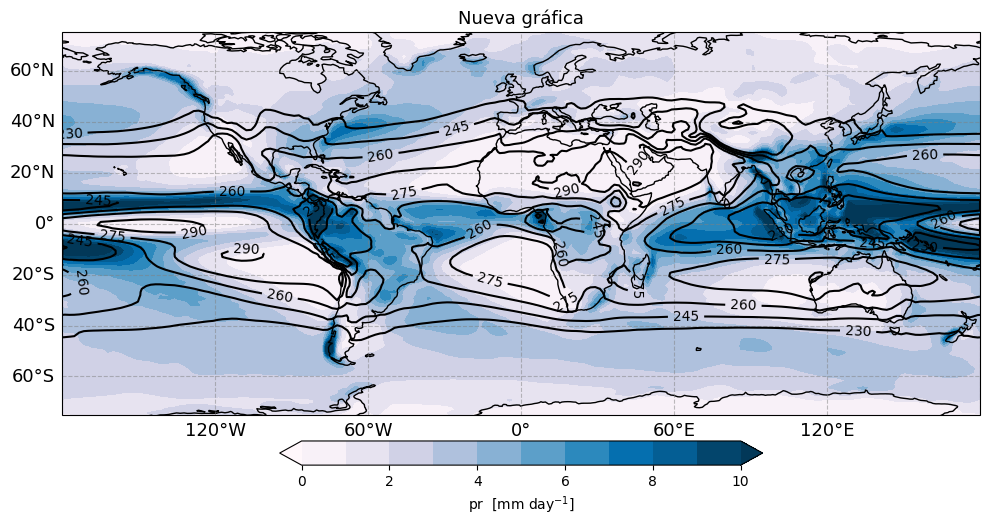

In [70]:
new_map(data, levels, contourdata, ccmap, 'Nueva gráfica')

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 10 - Diferencias avanzadas </font>**

<font color="DarkBlue"> 1. Grafique las diferencias de precipitación y OLR en un solo mapa, con contourf y contour entre las simulaciones AMIP e historical. 
    
<font color="DarkBlue"> 2. Explique sus resultados indicando si las diferencias entre una variable y la otra están alineadas o correlacionadas y aventura una hipótesis sobre por qué podría ser ese el caso, o no. 
        
    
---

In [71]:
olramip=amipda.mean('time')
olrhist=histda.mean('time')
diferencia = olrhist - olramip
diferencia

<xarray.DataArray 'rlut' (lat: 144, lon: 192)> Size: 111kB
array([[ 0.9716034 ,  0.98217773,  0.987854  , ...,  0.97257996,
         0.97665405,  0.9761963 ],
       [ 1.286499  ,  1.2801819 ,  1.2874603 , ...,  1.2623901 ,
         1.2696075 ,  1.2756195 ],
       [ 1.4827881 ,  1.4890289 ,  1.492569  , ...,  1.4752655 ,
         1.488617  ,  1.4840698 ],
       ...,
       [-5.612686  , -5.669159  , -5.688904  , ..., -5.56575   ,
        -5.590271  , -5.6144257 ],
       [-5.2431793 , -5.25473   , -5.249527  , ..., -5.1952057 ,
        -5.1979675 , -5.2168884 ],
       [-4.7839813 , -4.786377  , -4.789978  , ..., -4.785263  ,
        -4.7865906 , -4.7766724 ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1

In [72]:
#diferencia = datap - dataorl
#contourdata = diferencia

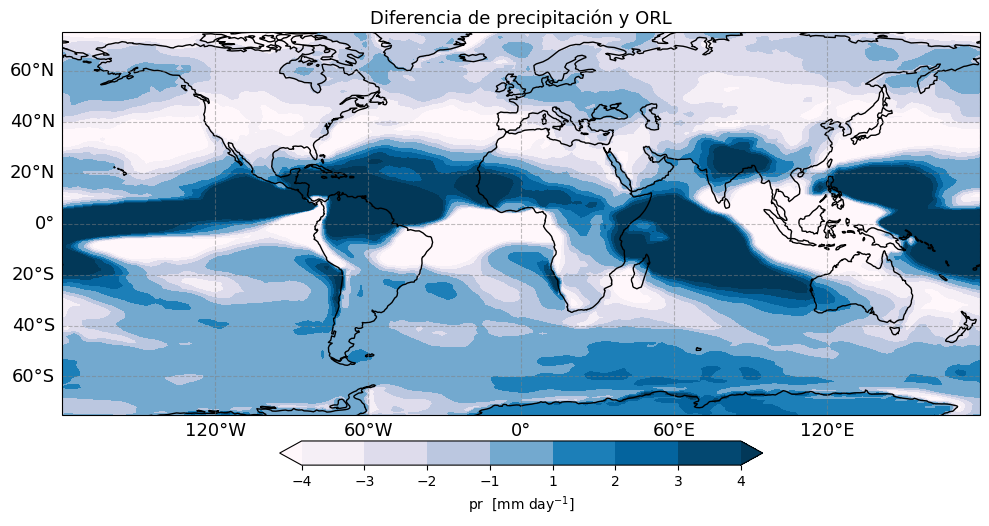

In [77]:
mapa_MC(diferencia, [-4,-3,-2,-1,1,2,3,4], ccmap, 'Diferencia de precipitación y ORL')